# Earth Engine Test

In [2]:
import ee

In [3]:
ee.Initialize()

## Example 1

In [76]:
collection = ee.ImageCollection('LANDSAT/LC8_L1T_TOA')

In [77]:
collection

In [78]:
collection = collection.filterDate("2010-01-01", "2020-01-01")

In [79]:
bands = {
    "B": "B2", 
    "G": "B3",
    "R": "B4"
}

In [80]:
series = ee.ImageCollection(
    'LANDSAT/LC8_L1T_TOA'
).filterDate(
    "2010-01-01", "2020-01-01"
).filter(
    ee.Filter.eq("WRS_PATH", 198)
).filter(
    ee.Filter.eq("WRS_ROW", 24)
).filter(
    ee.Filter.lt("CLOUD_COVER", 10)
).select(
    list(bands.values())
).toList(100)

In [81]:
series.size().getInfo()

16

In [82]:
region = ee.Geometry.Rectangle(
    [5.727906, 51.993435, 5.588144, 51.944356]
)

In [83]:
n_images = 10
images = [ee.Image(series.get(i)) for i in range(n_images)]

In [84]:
from IPython.display import Image

In [85]:
Image(
    url=images[0].getThumbUrl(
        {
            "min": 0,
            "max": 0.5,
            "bands": list(bands.values()),
            "region": region
        }
    )
)

In [86]:
Image(
    url=images[1].getThumbUrl(
        {
            "min": 0,
            "max": 0.5,
            "bands": list(bands.values()),
            "region": region
        }
    )
)

## to Arrays

In [64]:
import numpy

In [88]:
img_arrays = [
    numpy.array(
        ee.Image(
            series.get(1)
        ).sampleRectangle(
            region=region
        ).get(
            bands[color]
        ).getInfo() 
    )
    for color in ("R", "G", "B")
]

In [89]:
img_arrays = [numpy.expand_dims(img_array, 2) for img_array in img_arrays]

In [90]:
img = numpy.concatenate(img_arrays, 2)

In [91]:
import matplotlib.pyplot as plt

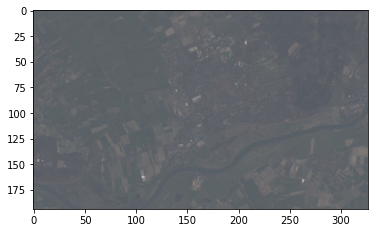

In [95]:
plt.imshow(img + 0.3)